In [1]:
!pip install tensorflow scikit-learn pandas numpy matplotlib seaborn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical


In [3]:
# Load dataset
df = pd.read_csv("RT_IOT2022.csv")

# Drop unnecessary columns
df.drop(columns=["Unnamed: 0"], inplace=True, errors="ignore")

# Encode categorical features
label_encoders = {}
for col in ["proto", "service", "Attack_type"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store for decoding later

# Define features and target
X = df.drop(columns=["Attack_type"])
y = df["Attack_type"]

# Normalize features (important for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert labels to one-hot encoding
y_categorical = to_categorical(y)

# Train-Test Split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y)


In [4]:
# Define Neural Network
model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),  # Input Layer
    BatchNormalization(),  # Normalization
    Dropout(0.3),  # Regularization

    Dense(64, activation="relu"),  # Hidden Layer 1
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation="relu"),  # Hidden Layer 2
    BatchNormalization(),
    Dropout(0.3),

    Dense(y_train.shape[1], activation="softmax")  # Output Layer (Multiclass Classification)
])

# Compile Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Display Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          10,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │             396 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,380 (87.42 KB)

 Trainable params: 21,932 (85.67 KB)

 Non-trainable params: 448 (1.75 KB)

In [5]:
# Train Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)


Epoch 1/50
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8441 - loss: 0.5708 - val_accuracy: 0.9805 - val_loss: 0.0653
Epoch 2/50
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9794 - loss: 0.0714 - val_accuracy: 0.9886 - val_loss: 0.0491
Epoch 3/50
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9854 - loss: 0.0520 - val_accuracy: 0.9901 - val_loss: 0.0528
Epoch 4/50
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9872 - loss: 0.0450 - val_accuracy: 0.9926 - val_loss: 0.0473
Epoch 5/50
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9904 - loss: 0.0339 - val_accuracy: 0.9927 - val_loss: 0.0375
Epoch 6/50
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9895 - loss: 0.0341 - val_accuracy: 0.9929 - val_loss: 0.0373
Epoch 7/50
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9905 - loss: 0.0324 - val_accuracy: 0.9915 - val_loss: 0.0398
Epoch 8/50
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9910 - loss: 0.030

770/770 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9959 - loss: 0.0212
Test Accuracy: 0.9960


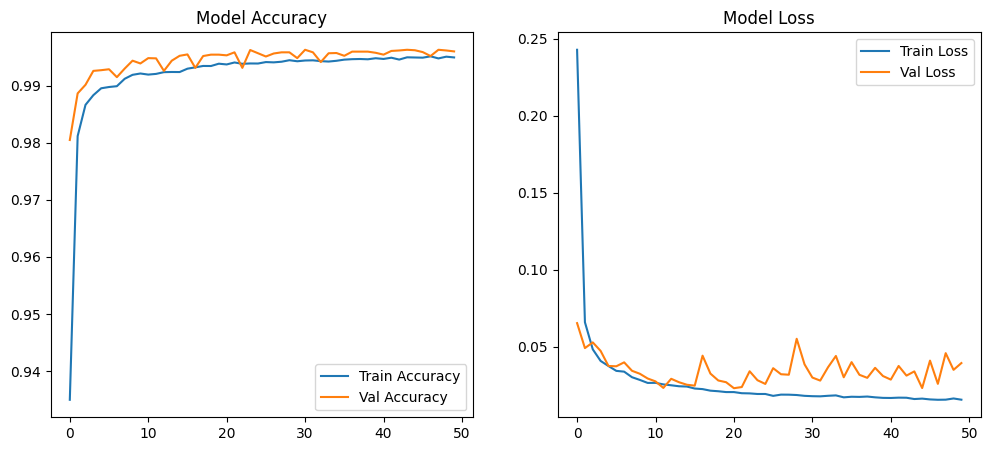

In [6]:
# Evaluate on Test Data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot Accuracy & Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Model Loss")

plt.show()


In [7]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoding to class index
y_test_classes = np.argmax(y_test, axis=1)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test_classes, y_pred_classes))


770/770 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1550
           1       0.99      0.80      0.89       107
           2       1.00      1.00      1.00     18932
           3       1.00      1.00      1.00       829
           4       0.86      0.86      0.86         7
           5       1.00      0.83      0.91         6
           6       1.00      1.00      1.00       400
           7       1.00      1.00      1.00       200
           8       0.96      0.98      0.97       518
           9       1.00      1.00      1.00       402
          10       0.99      0.97      0.98      1622
          11       0.88      0.96      0.92        51

    accuracy                           1.00     24624
   macro avg       0.97      0.95      0.96     24624
weighted avg       1.00      1.00      1.00     24624

